# Import Dependencies 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
from warnings import simplefilter
simplefilter(action='ignore')

In [4]:
df=pd.read_csv(r'synthetic_logs.csv')
df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


# Data Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     2410 non-null   object
 1   source        2410 non-null   object
 2   log_message   2410 non-null   object
 3   target_label  2410 non-null   object
 4   complexity    2410 non-null   object
dtypes: object(5)
memory usage: 94.3+ KB


In [6]:
df.shape

(2410, 5)

In [7]:
df['target_label'].value_counts()

target_label
HTTP Status            1017
Security Alert          371
System Notification     356
Error                   177
Resource Usage          177
Critical Error          161
User Action             144
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

# Data Preprocessing

In [8]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='mixed')

In [9]:
df.isnull().sum()

timestamp       0
source          0
log_message     0
target_label    0
complexity      0
dtype: int64

In [10]:
print("Duplicates",df.duplicated().sum())

Duplicates 0


# EDA(Exploratory Data Analysis)

In [11]:
from wordcloud import WordCloud,STOPWORDS

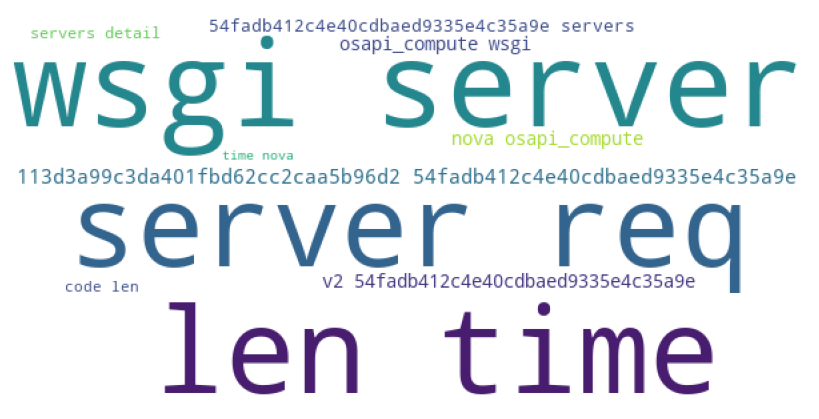

In [12]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.log_message:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 600, height = 300,
                background_color ='white',

                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Feature Engineering

In [15]:
from sentence_transformers import SentenceTransformer

e:\Software-log-Monitoring-system-using-Hybrid-Classification-Model\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
model=SentenceTransformer('all-MiniLm-L6-v2')

In [27]:
embeddings=model.encode(df['log_message'].tolist())